In [200]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Simulating a Driven Damped Pendulum
We'll be using dimensionless variables so that the natural frequency is equal to 1.

I'll be using the parameters as defined below
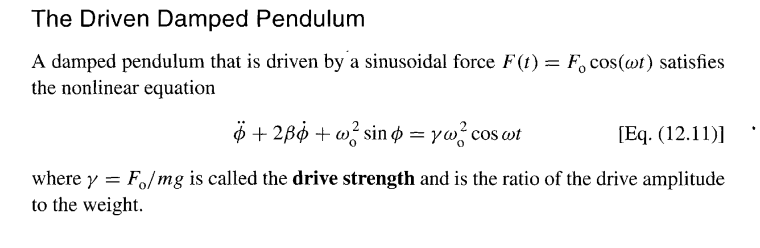

$
\frac{d\phi}{d\\t} = \dot{\phi}
\\[5mm]
\frac{d\dot{\phi}}{d\\t} = -\omega_0^2 sin(\phi) - 2\beta\dot{\phi} + \gamma \omega_0^2 cos(\omega t)
$

In [201]:
# 
def eom_dpp(t,state,beta,gamma,omega0,omega):
    '''
    Function returning derivatives of the dependent quantities theta and omega for a driven damped pendulum
    state: Array of size 2 describing state of the system
        state[0]: phi, the pendulum angle from the vertical
        state[1]: phi_dot, angular velocity    
    beta: damping parameter
    gamma: drive strength
    omega0: Resonant frequency
    omega: drive frequency
    '''

    phi = state[0]
    phi_dot = state[1]

    d_phi_dt = phi_dot
    d_phi_dot_dt = -2*beta*phi_dot - omega0**2*np.sin(phi) + gamma*omega0**2*np.cos(omega*t)
    return (d_phi_dt,d_phi_dot_dt)

In [391]:
phi0 = -np.pi/2        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])


gamma = 1.5        # Driving amplitude
omega = 2*np.pi     # Driving frequency
omega0 =  1.5*omega      # Natural frequency
beta = omega0/8         # Damping parameter

t_start = 0
t_end = 200
t_eval = np.linspace(t_start,t_end,6001)


In [392]:
sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma,omega0,omega))

phi = sol.y[0]
phi_dot = sol.y[1]
t = sol.t


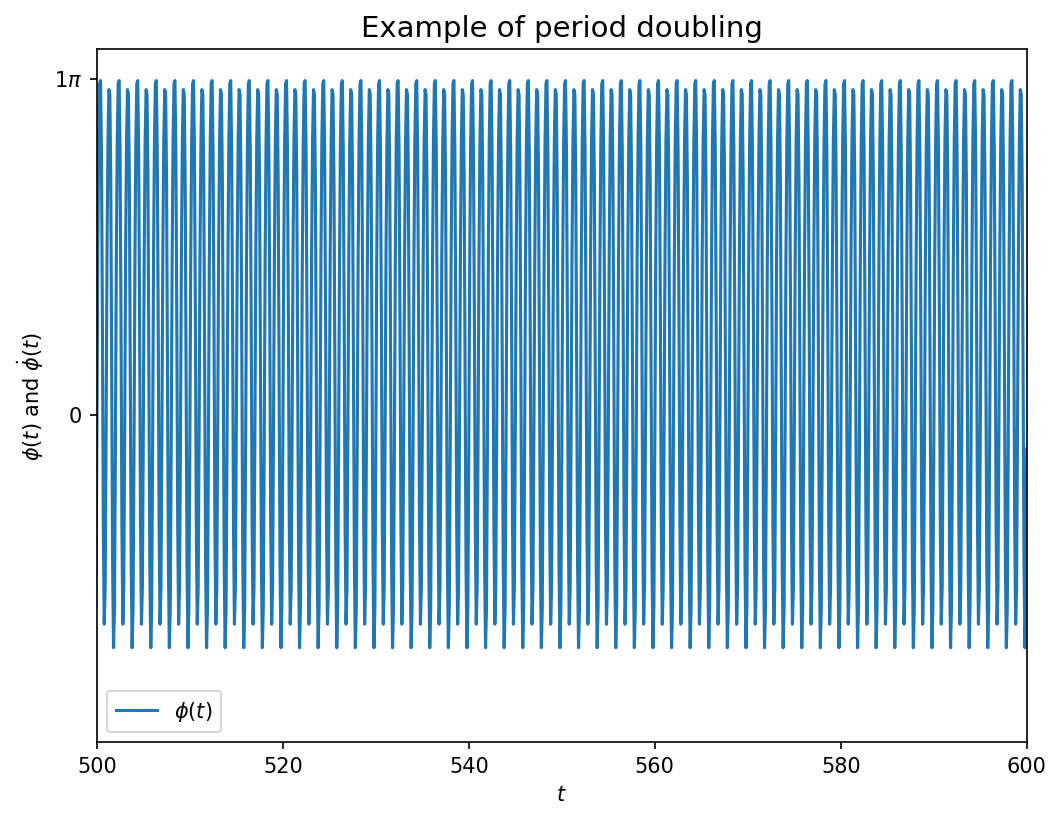

In [381]:
f,ax = plt.subplots(figsize=(8,6),dpi=150)

ax.plot(t_eval,phi, label='$\phi(t)$')
#ax.plot(t,phi_dot/(2*np.pi), label = '$\dot{\phi}(t)$')

ax.set_title("Example of period doubling",fontsize=14)
ax.set_xlabel("$t$")
ax.set_ylabel("$\phi(t)$ and $\dot{\phi}(t)$"); # No idea why I need \\theta
ax.legend()
ax.set_xlim([500,600])
# For setting the y-axis in units of pi
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))

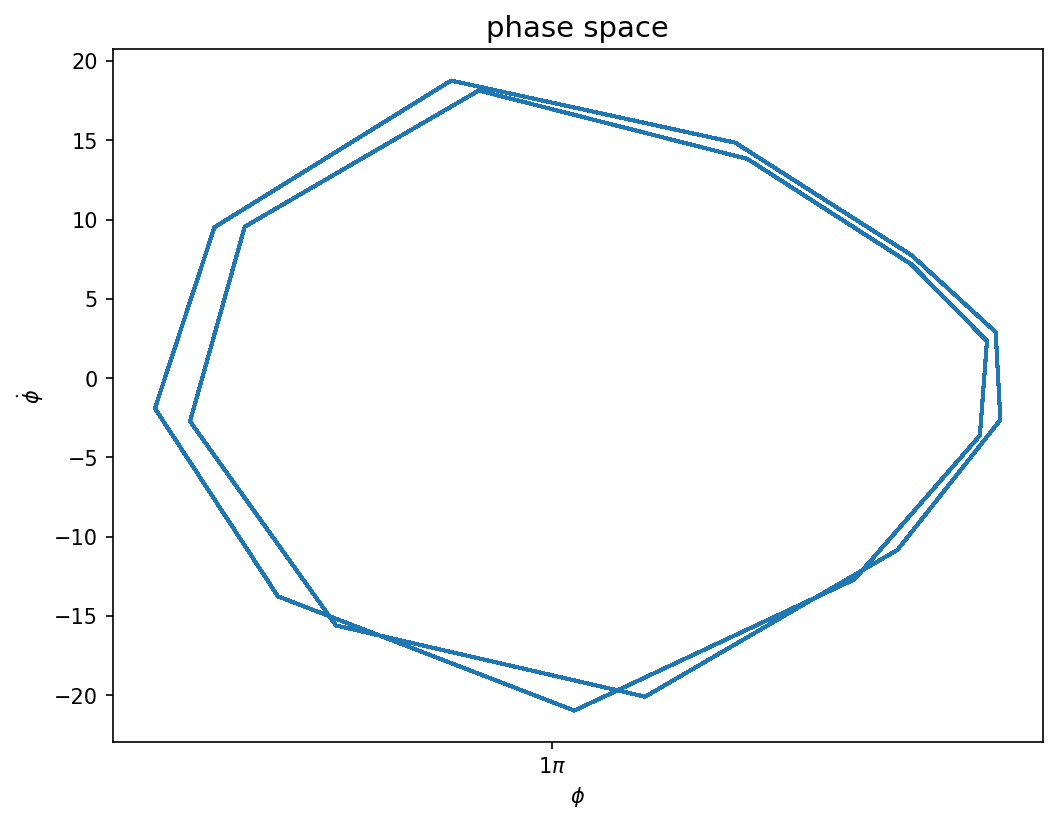

In [ ]:
f,ax = plt.subplots(figsize=(8,6),dpi=150)

ax.set_xlabel("$\phi$")
ax.set_ylabel("$\dot{\phi}$")
ax.set_title("phase space",fontsize=14)
tplot = 100

phi_remainder = np.remainder(phi-1.1*np.pi,2*np.pi)
ax.plot(phi_remainder[tplot:],phi_dot[tplot:]);

# For setting the y-axis in units of pi
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

# Bifurcation Map

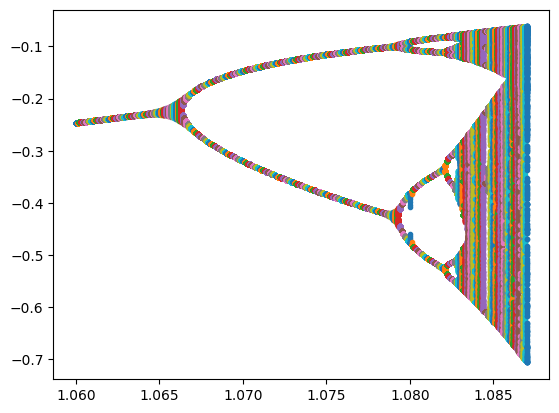

In [394]:
gamma_list = np.linspace(1.06,1.087,271)

phi0 = -np.pi/2        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])


omega = 2*np.pi     # Driving frequency
omega0 =  1.5*omega      # Natural frequency
beta = omega0/4         # Damping parameter

t_start = 0
t_end = 600
t_eval = np.linspace(t_start,t_end,6001)

for gamma in gamma_list:
    sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma,omega0,omega))

    phi = sol.y[0]
    size = len(phi[500::10])
    plt.plot(gamma*np.ones(size),phi[500::10], '.')

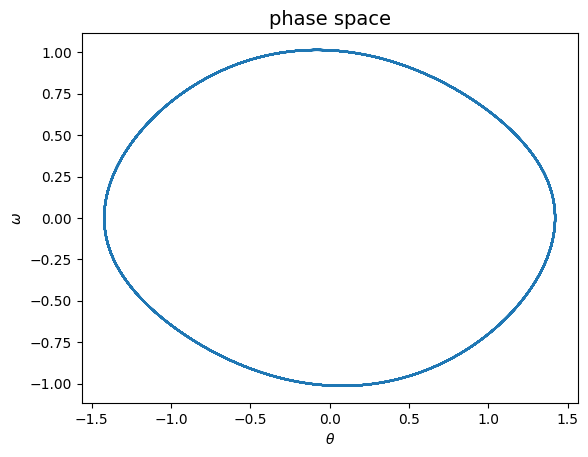

In [19]:
plt.figure(4)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 5000
plt.plot(th[tplot:],om[tplot:]);

In [10]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.105        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(14,1000*t_d, 10001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

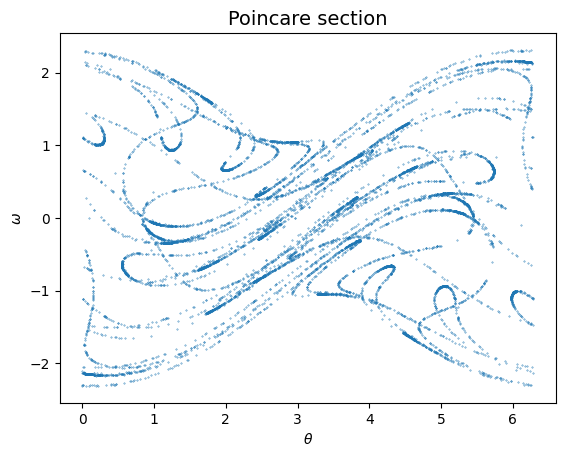

In [11]:
plt.figure(5)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(th%(2*np.pi),om,s=0.1);